# SVM - The primal Problem

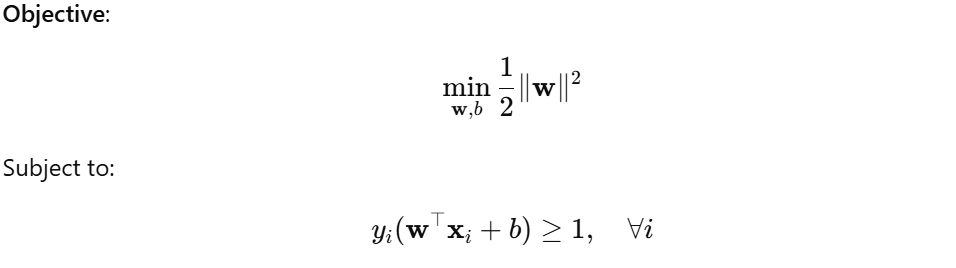

* To handle misclassified points, we introduce a regularization term with hinge loss:

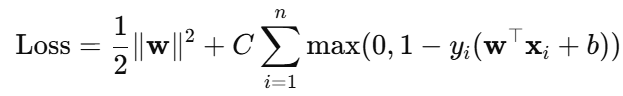

* C: Regularization parameter controlling the trade-off between margin size and misclassification.

* The hinge loss gradient is computed for each point:

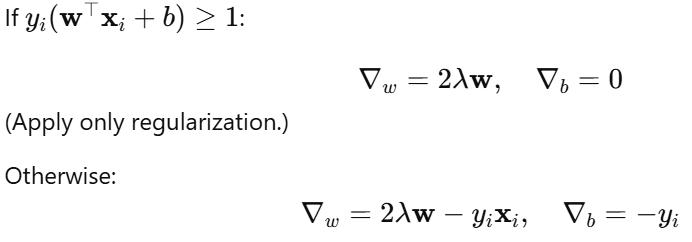


* Initialize weights (𝑤) and bias (𝑏) to zero
* For 𝑛_iters iterations and for each sample (𝑥_𝑖, 𝑦_𝑖):
* Compute the condition and update weights and bias based on the condition

In [1]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Ensure labels are -1 or +1

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Correct classification, only apply regularization
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    # Misclassification
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

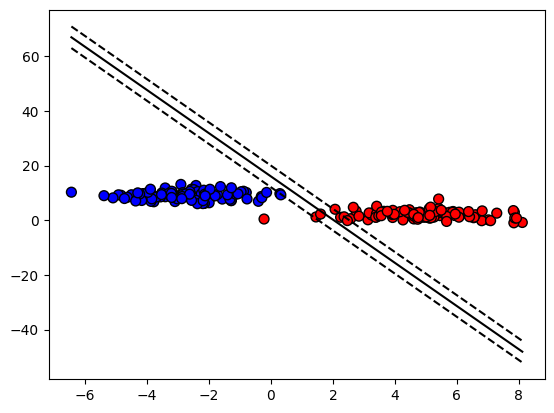

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a dataset
# X, y = make_blobs(n_samples=100, centers=2, random_state=42)
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)

y = np.where(y == 0, -1, 1)  # Convert labels to -1 and +1

# Train the SVM
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

# Predict and visualize
def visualize_svm(X, y, model):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolor='k', label='Data Points')

    # Hyperplane
    x0_1 = np.min(X[:, 0])
    x0_2 = np.max(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

    plt.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    # Margins
    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 1)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 1)
    plt.plot([x0_1, x0_2], [x1_1, x1_2], "k--")

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, -1)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, -1)
    plt.plot([x0_1, x0_2], [x1_1, x1_2], "k--")

    plt.show()

visualize_svm(X, y, svm)
